# Propiedades de la derivada
## Regla del producto

In [2]:
import sympy as sp
from sympy import symbols
x = symbols('x')

f= x**3 - x**2 + 2
f

x**3 - x**2 + 2

In [3]:
from sympy import diff
diff(f,x)

3*x**2 - 2*x

### Regla del producto

In [4]:
from sympy import Function
x,y = symbols('x y')
f,g = symbols('f g', cls=Function)

h = f(x)*g(x)
display(h)
dhdx = h.diff()
dhdx

f(x)*g(x)

f(x)*Derivative(g(x), x) + g(x)*Derivative(f(x), x)

In [5]:
# podemos aplicar esto a funciones especificas.
dhdxsym = dhdx.subs( [ (g(x), sp.sin(x)), (f(x), sp.cos(x))])
dhdxsym

sin(x)*Derivative(cos(x), x) + cos(x)*Derivative(sin(x), x)

In [7]:
dhdxsym = dhdx.subs( [ (g(x), sp.sin(x)), (f(x), sp.cos(x))]).doit()
dhdxsym

-sin(x)**2 + cos(x)**2

In [8]:
dhdxsym.doit()

-sin(x)**2 + cos(x)**2

In [9]:
# verficamos
dsc = diff( sp.sin(x)*sp.cos(x), x)
dsc

-sin(x)**2 + cos(x)**2

In [12]:
from sympy import simplify
simplify(dsc)

cos(2*x)

## The Quotient rule (ley la division)

In [13]:
h = f(x)/g(x)
display(h)
dhdx = h.diff()
dhdx

f(x)/g(x)

-f(x)*Derivative(g(x), x)/g(x)**2 + Derivative(f(x), x)/g(x)

In [14]:
dhdx.together()

(-f(x)*Derivative(g(x), x) + g(x)*Derivative(f(x), x))/g(x)**2

In [15]:
# sustituciones
dhdxsym = dhdx.subs( [  (g(x), sp.sin(x)), (f(x) , sp.cos(x))])
dhdxsym

Derivative(cos(x), x)/sin(x) - cos(x)*Derivative(sin(x), x)/sin(x)**2

In [16]:
dhdxdoit = dhdxsym.doit()
dhdxdoit

-1 - cos(x)**2/sin(x)**2

In [19]:
from sympy import trigsimp
trigsimdhdx = trigsimp(dhdxdoit)
trigsimdhdx

-1/sin(x)**2

## Actividad #1
Estamos acostumbrados en que la derivada de $\cot x$ es $-\csc^2 x$.
`SymPy` no muestra esto. La tarea es buscar 2 metodos distintos
para que aparezca $-\csc^2 x.$

In [20]:
# verificacion
toCompare = diff( sp.cos(x)/sp.sin(x), x)
toCompare

-1 - cos(x)**2/sin(x)**2

In [21]:
toCompare == dhdxdoit

True

In [23]:
diff(f(x)+g(x),x)

Derivative(f(x), x) + Derivative(g(x), x)

## La regla de la cadena

In [24]:
from  sympy import Function, symbols, diff
import sympy as sp
x,y = symbols('x y')
f,g = symbols('f g ', cls=Function)
g=g(x)
f = f(x + g) # composicion de funciones
f

f(x + g(x))

In [25]:
# sacamos la derivada
dfdx = diff(f, x)
dfdx


(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [26]:
# susticiones
dfdx.subs (   [ (g, sp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [27]:
dfdx.subs (   [ (g, sp.sin(x))]).doit()


(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [29]:
# sustituyamos ambos, f, g
dfdx.subs (  [ (g, sp.sin(x)), (f, sp.cos(x))]).doit() # por que no sustituyo f(x) ?

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Actividad #2
Arregle el problema de la celda anterior de por que la $f$ no
se sustituyo.

**bono**: Esta actividad es voluntaria, y si la hace correctamente
subo 2 decimas a su nota final.

## Mas de la regla de la cadena

In [38]:
x,y = symbols('x  y')
f,g = symbols('f g', cls=Function)

g=g(x)
f=f(g) # composicion de funciones
display(f)

dfdx = diff(f,x)
dfdx # la regla de la cadena clasica


f(g(x))

Derivative(f(g(x)), g(x))*Derivative(g(x), x)

In [34]:
# sustituciones
xi = symbols('xi')
dfdx.subs ( [ (xi, sp.sin(x)), (f, sp.cos(x)), (g, sp.sin(x))]).doit()

0

In [35]:
dfdx.subs(f, sp.cos(xi)).subs(g, sp.sin(x))

Derivative(sin(x), x)*Subs(Derivative(cos(xi), _xi), _xi, sin(x))

In [37]:
dfdx.subs(f,sp.cos(x)).subs(g, sp.sin(x)).doit()

0

## Actividad #3
La derivada anterior no debe ser 0, por que?

Tenemos $g(x)=\sin x$, $f(x)= \cos x$ de forma que

$$f(g(x))=\cos (\sin (x)) .$$

Saquemos la derivada con lo que aprendimos en nuestro curso de calculo diferencia.

$$ \frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx} = -\sin( \sin x) \cos x \cos x = - \sin( \sin x) \cos^2 x   .$$



## mas en derivadas

$$ \frac{d}{dx} \left ( \frac{1 + \sin x}{12 - \cos x} \right )^2 .$$

In [40]:
dfdx = diff (  ((1 + sp.sin(x))/(1 - sp.cos(x)))**2, x )
dfdx

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [42]:
# together agrupa facciones sin simplificarlas
from sympy import together
dfdx.together()

2*((1 - cos(x))*cos(x) - (sin(x) + 1)*sin(x))*(sin(x) + 1)/(1 - cos(x))**3

In [44]:
from sympy import simplify
simplify(dfdx)

2*(-sqrt(2)*cos(x + pi/4) + 1)*(sin(x) + 1)/(cos(x) - 1)**3

In [45]:
# metamosle logaritmo
from sympy import log
x = symbols('x')
diff(log(x))

1/x

In [46]:
diff( log(x, 10))

1/(x*log(10))

In [55]:
# note que, distintas (4) formas de hallar la derivada
f = x**2
diff(f,x) # clasica

2*x

In [56]:
diff(f) # f es funcion solo de x y hay ambiguedad.

2*x

In [57]:
diff(f, x, 1)

2*x

In [58]:
f.diff(x)

2*x

# Problemas de valores extremos (maximos/minimos)
Tomado de
[StackOverflow](https://stackoverflow.com/questions/53289609/how-to-graph-points-with-sympy).

La funcion en question es

$$f(x) = x \mathrm{e}^{-x^2/10} .$$


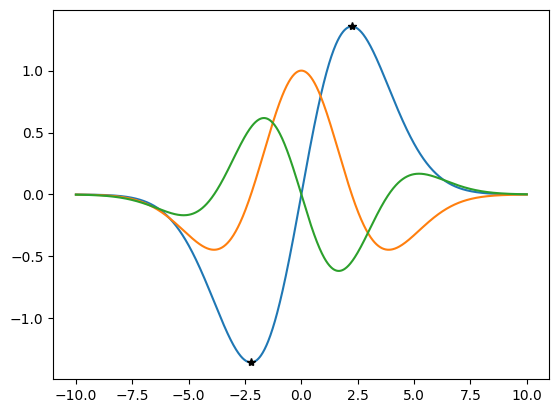

In [60]:
from sympy import solve, exp, lambdify
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
equation = x*exp(-x**2/10)
firstDeriv = equation.diff(x)
secondDeriv = firstDeriv.diff(x)

# absisas puntos criticos
criticalPoints = solve( firstDeriv, x)
# ordenadas de los puntos criticos
criticalPointsY = [equation.subs(x, a) for a in criticalPoints] # comprehensive list

# el dominio
xx = np.linspace(-10, 10, 1000)
yy = lambdify( x, [ equation, firstDeriv, secondDeriv,])(xx)

# las tres funciones, f, f', f''
plt.plot(xx, np.transpose(yy))

# puntos
plt.plot( criticalPoints, criticalPointsY ,"k*")
plt.show()





In [61]:
criticalPoints


[-sqrt(5), sqrt(5)]

In [63]:
firstDeriv

-x**2*exp(-x**2/10)/5 + exp(-x**2/10)

## Actividad 4. Insertar la leyenda (legend) para que se vea bien cuales son $f,f',f''$.

# Calculo integral

Comencemos con **antiderivadas**

Verificamos que


$$\int \cot t \csc x dx = -\frac{1}{\sin x} + C = - \csc x + C .$$
Note que `SymPy` no muestra la constante

In [67]:
from sympy import integrate, symbols
import sympy as sp
x = symbols('x')
integrate( sp.cot(x) * sp.csc(x),x) # el ,x es opcional

-1/sin(x)

In [68]:
y = symbols('y')
f = x**y  # integral de una potencia
fint = integrate(f, x)
fint

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

In [69]:
type(fint)

Piecewise

In [70]:
h = x**3
h*fint

x**3*Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

## Problema de valor inicial (IVP: Initial Value Problem)
Piense en la siguiente ecuacion diferencial


$$ \frac{dy}{dx} = t^2 + 1  \quad , \quad y(1)=4.$$

Por que esto es una ecuacion diferencial? por que la incognita
es $y$ que esta dentro de una derivada.

Como `SymPy` hace esto?
Este problema corresponde al campo de **ecuaciones diferenciales** que vemos mas adelante.



In [71]:
# integramos la funcion de la derecha
# para resolver diferenciales se integra
t = symbols('t')
integral = integrate(t**2 + 1, t)
integral

t**3/3 + t

In [72]:
# recuerde que sympy ignora la constante C
C = symbols('C')
y = integral + C # a la fuerza metemos la constante
y



C + t**3/3 + t

In [75]:
ysubs = y.subs(t,1)
ysubs

C + 4/3

In [76]:
# debemos encontrar el valor de C
from sympy import solve
Ceval = solve( ysubs -4, C)
Ceval

[8/3]

In [78]:
from sympy import sqrt, tan
integrate(sqrt( tan(x))).doit()

Integral(sqrt(tan(x)), x)

## Tarea para mi. Investigue esta integral